# K-MEANS


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
make_blobs?

In [49]:
X,Y = make_blobs(n_samples=1000, centers=4)
print(X.shape,Y.shape)

(1000, 2) (1000,)


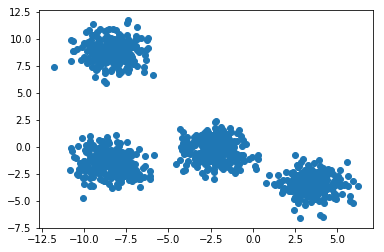

In [50]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [68]:
k =4
colors = ['green','red','blue','orange']

clusters = {}
np.random.random?
for ix in range(k):
    centre = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        "centre": centre,
        "points" : points,
        "color":colors[ix]
    }
    clusters[ix] = cluster

print(clusters)

{0: {'centre': array([-4.91565832,  4.63367796]), 'points': [], 'color': 'green'}, 1: {'centre': array([-2.07808113, -3.77714995]), 'points': [], 'color': 'red'}, 2: {'centre': array([ 2.65107952, -4.88446799]), 'points': [], 'color': 'blue'}, 3: {'centre': array([-3.85990864,  0.74274143]), 'points': [], 'color': 'orange'}}


In [52]:
def dist(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

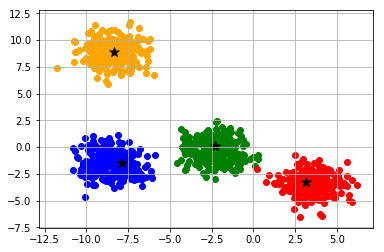

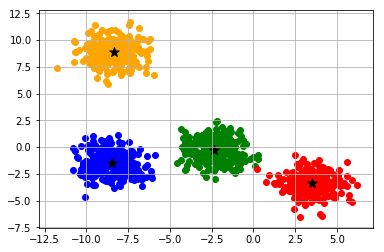

In [56]:
for ix in range(X.shape[0]):
    dis = []
    curr_p = X[ix]
    
    for kx in range(k):
        d = dist(curr_p, clusters[kx]['centre'])
        dis.append(d)
    
    current_cluster = np.argmin(dis)
    
    clusters[current_cluster]['points'].append(curr_p)

for kx in range(k):
    pts = np.array(clusters[kx]['points'])
    
    clusters[kx]['coords'] = pts
    
plt.figure(0)
plt.grid("on")

for kx in range(k):
    pts = clusters[kx]['coords']
    
    try:
        plt.scatter(pts[:,0],pts[:,1], color = clusters[kx]['color'])
    except:
        pass
    
    centre = clusters[kx]['centre']
    plt.scatter(centre[0],centre[1], color="black", s=100, marker="*")
    
for kx in range(k):
    if clusters[kx]['coords'].shape[0]>0:
        new_centre = clusters[kx]['coords'].mean(axis=0)
        
    else:
        new_centre = clusters[kx]['centre']
        
    clusters[kx]['centre'] = new_centre
    clusters[kx]['points'] = []
    
plt.figure(1)
plt.grid("on")

for kx in range(k):
    pts = clusters[kx]['coords']
    
    try:
        plt.scatter(pts[:,0],pts[:,1], color = clusters[kx]['color'])
    except:
        pass
    
    centre = clusters[kx]['centre']
    plt.scatter(centre[0],centre[1], color="black", s=100, marker="*")
    

# From Sklearn

In [62]:
from sklearn.cluster import KMeans

In [64]:
kmeans = KMeans(n_clusters=5)

In [69]:
z = kmeans.fit_transform(X)

In [71]:
cen = kmeans.cluster_centers_

In [74]:
Y = kmeans.labels_

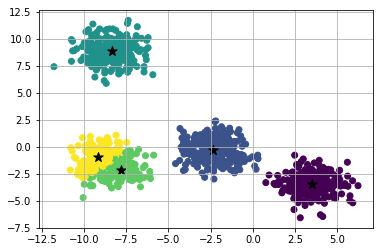

In [77]:
plt.figure()
plt.grid("on")

plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(cen[:,0],cen[:,1], color = 'black', s=100, marker="*")
plt.show()